# Data Exploration

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import itertools
import re
import nltk

## Dataset: [The Internet Movie Script Database (IMSDb)](https://imsdb.com/)

In [2]:
df = pd.read_csv('data/imsdb-scripts.csv')

In [3]:
df0 = df.copy()

Data have been obtained by scraping. During that, missing values (movies without script) have been handled.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1140 entries, 0 to 1139
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    1140 non-null   object
 1   genre    1140 non-null   object
 2   writers  1140 non-null   object
 3   url      1140 non-null   object
 4   script   1140 non-null   object
dtypes: object(5)
memory usage: 44.7+ KB


In [5]:
df.head()

,title,genre,writers,url,script
0,10 Things I Hate About You,"['Comedy', 'Romance']","['Karen McCullah Lutz', 'Kirsten Smith', 'Will...",https://imsdb.com/scripts/10-Things-I-Hate-Abo...,\n\r\n\r\n\r\nTen Things I Hate About You - by...
1,12,['Comedy'],['Lawrence Bridges'],https://imsdb.com/scripts/12.html,\n\n\n \r\n 12 - Script\r\n[[None]]\n
2,12 and Holding,['Drama'],['Anthony Cipriano'],https://imsdb.com/scripts/12-and-Holding.html,\n \r\n\n\n\n[[12ANDHOLDING]]\n\n\n ...
3,12 Monkeys,"['Drama', 'Sci-Fi', 'Thriller']","['David Peoples', 'Janet Peoples']",https://imsdb.com/scripts/12-Monkeys.html,\n\r\n\r\n\r\nTwelve Monkeys\r\n\r\n\r\n[[TWEL...
4,12 Years a Slave,['Drama'],['John Ridley'],https://imsdb.com/scripts/12-Years-a-Slave.html,\n\r\n\r\n\r\n[[12YEARSASLAVE]]\n\r\n\r\n\r\n\...


In [6]:
def random_script(df):
    return df.iloc[random.randint(0, len(df))]['script']

In general, script formatting is standardized. Square brackets represent original bold formatting, which for the most identifies movie characters.

In [7]:
print(random_script(df))






[[ALLABOUTSTEVE]]


                                  Written by

                                  Kim Barker



                                                         November 2006




[[TNT.KITCHEN-DAY]]
          A New York Times crossword puzzle. The hand of MARY HOROWITZ
          scratches the answers in ink without pausing even a second
          between each one.

[[MARY(V.O.)]]
          Vita aenigma est. Life is a
          puzzle. It is. Specifically, life
          is most like a crossword puzzle.
          There are a million reasons why,
          not the least of which is that
          life, like crosswords, requires the
          use of your whole entire brain-
          Her writing hand knocks a glass of grape soda and it spills
          all over the puzzle.

[[MARY]]
          Crap.
          The puzzle answers all run together.

[[INT.SCHOOLHALLWAY-DAY]]

          Ten plastic folding chairs line the hallway -- all empty
          except for one.
          

During scraping, genres have been stored in a list, but now they are a string in a list format. We must process them. Then, we store them in binary variables.

In [8]:
def process_genre_string(genre_string):
    for char in ['[',']','.',',','\'']:
        genre_string = genre_string.replace(char, ' ')
    return genre_string.split()


genres = list()
# getting the list of the genres
for genres_in_movie in df['genre']:
    genres_found = [g for g in process_genre_string(genres_in_movie)]
    genres = list(set(genres + genres_found))
genres.remove('None')
genres

['Animation',
 'War',
 'Adventure',
 'Sci-Fi',
 'Drama',
 'Sport',
 'Family',
 'Thriller',
 'Romance',
 'Musical',
 'Fantasy',
 'Horror',
 'Crime',
 'Western',
 'Comedy',
 'Biography',
 'Film-Noir',
 'History',
 'Action',
 'Mystery',
 'Music',
 'Short']

In [9]:
# storing every genre in a binary variable
for genre in genres:
    df[genre] = [1 if genre in g else 0 for g in df['genre'].values]

In [10]:
df.drop(['writers','url', 'title', 'genre'], 1, inplace=True)
df.head()

/tmp/ipykernel_183570/2992972678.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['writers','url', 'title', 'genre'], 1, inplace=True)


,script,Animation,War,Adventure,Sci-Fi,Drama,Sport,Family,Thriller,Romance,...,Crime,Western,Comedy,Biography,Film-Noir,History,Action,Mystery,Music,Short
0,\n\r\n\r\n\r\nTen Things I Hate About You - by...,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
1,\n\n\n \r\n 12 - Script\r\n[[None]]\n,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,\n \r\n\n\n\n[[12ANDHOLDING]]\n\n\n ...,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,\n\r\n\r\n\r\nTwelve Monkeys\r\n\r\n\r\n[[TWEL...,0,0,0,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,\n\r\n\r\n\r\n[[12YEARSASLAVE]]\n\r\n\r\n\r\n\...,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Genre can be our ground truth for a binary classification (e.g. drama not-drama) or a multiclass classification.

In [11]:
sorted([(genre, sum(df[genre].values)) for genre in genres],
       key=lambda x: x[1],
       reverse=True)

[('Drama', 621),
 ('Thriller', 381),
 ('Comedy', 371),
 ('Action', 309),
 ('Crime', 217),
 ('Romance', 196),
 ('Adventure', 186),
 ('Sci-Fi', 167),
 ('Horror', 155),
 ('Fantasy', 116),
 ('Mystery', 112),
 ('Animation', 42),
 ('Family', 42),
 ('Music', 30),
 ('War', 28),
 ('Musical', 25),
 ('Western', 15),
 ('Film-Noir', 4),
 ('Biography', 3),
 ('History', 3),
 ('Short', 3),
 ('Sport', 2)]

Genres are not mutually exclusive. There can be some relations between them. We can treat movies like sets according to genre using the Jaccard index.

In [12]:
def jaccard_binary(x,y):
    intersection = np.logical_and(x, y)
    union = np.logical_or(x, y)
    similarity = intersection.sum() / float(union.sum())
    return similarity

genres_similarities = list()
for genre_combination in list(itertools.combinations(genres, 2)):
    genre_similarity = jaccard_binary(df[genre_combination[0]],
                                      df[genre_combination[1]])
    # threshold
    if genre_similarity > 0.05:
        genres_similarities.append((f'{genre_combination[0]} {genre_combination[1]}',
                                    genre_similarity))

sorted(genres_similarities,
       key=lambda x: x[1],
       reverse=True)

[('Musical Music', 0.8333333333333334),
 ('Animation Family', 0.3125),
 ('Adventure Action', 0.30606860158311344),
 ('Thriller Action', 0.2730627306273063),
 ('Sci-Fi Action', 0.2625994694960212),
 ('Thriller Crime', 0.25630252100840334),
 ('Thriller Horror', 0.24074074074074073),
 ('Drama Thriller', 0.23095823095823095),
 ('Romance Comedy', 0.2167381974248927),
 ('Drama Romance', 0.19970631424375918),
 ('Thriller Mystery', 0.19951338199513383),
 ('Drama Crime', 0.1988555078683834),
 ('Adventure Sci-Fi', 0.19661016949152543),
 ('Adventure Fantasy', 0.1796875),
 ('Family Musical', 0.17543859649122806),
 ('Family Music', 0.16129032258064516),
 ('Drama Comedy', 0.1588785046728972),
 ('Crime Action', 0.15859030837004406),
 ('Sci-Fi Thriller', 0.15611814345991562),
 ('Horror Mystery', 0.1459227467811159),
 ('Family Fantasy', 0.1366906474820144),
 ('Fantasy Action', 0.13636363636363635),
 ('Animation Musical', 0.13559322033898305),
 ('Animation Adventure', 0.13432835820895522),
 ('Sci-Fi Hor

## From Text to Time Series

### Defining timestamps

First, we must identify our timestamps. Scripts are divided into lines. We can use square brackets (bold formatting) as a splitting condition. This is much refined and domain-based than sentence splitting.

In [13]:
def script_splitting(script):
    #
    script = re.sub(r'\((\d+|'
                    r'[Cc][Oo][Nn][Tt](\'|[Ii][Nn][Uu][Ed])[Dd]|'
                    r'[Mm][Oo][Rr][Ee])\)',
                    '', script)
    script = ' '.join(script.split())
    #
    script = re.sub(r'\[.+?\] ', '[SEP]', script)
    script = re.sub(r'(\[SEP\])+', '[SEP]', script)
    split_script = [line for line in re.split(r' ?\[SEP\]', script) if line]
    if not split_script:
        return ['']
    # cleaning
    # TODO: set more refined rules or cut the fist n lines
    if split_script[0].startswith('Written by'):
        split_script.pop(0)
    return split_script

In [14]:
script_splitting(random_script(df))

['The events in this film are real. Names and places have been changed to protect the Lorien Six, who remain in hiding. Take this as your first warning. Other civilizations do exist. Some of them seek to destroy you.',
 'pinprick the velvet-black sky that stretches over a vast sleeping jungle. A fingernail moon silvers the whispering canopy while gentle tendrils of steam rise.',
 'CAMERA DRIFTS ACROSS the eternity of treetops until it FINDS',
 "It's 20x20 square, with a wraparound porch and simple wooden shutters. The structure is hidden in a clearing that's been crudely hacked out of the sweaty wilderness.",
 'Two beds draped in mosquito nets sit on opposite sides of the space. A TEEN BOY sleeps in one and a MIDDLE-AGED MAN lies in the other. Their ebony skin glistens in the swampy heat. The numbing THROB OF INSECTS fills the silence until',
 "The Teen's eyes fly open. Fear grips his face as he looks over at the Man, who is now upright and awake. They hold their breath, listening over

Once we have our lines, we can convert them into an actual timestamp extracting some numeric features like, for example:
- distributional features;
- sentiment/emotion analysis;
- word/sentence embedding.

The result would be a uni-variate or multivariate time series.

### Example: Sentiment Time Series with VADER

In [15]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/mattiap/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

Source code: [https://www.nltk.org/_modules/nltk/sentiment/vader.html](https://www.nltk.org/_modules/nltk/sentiment/vader.html)

VADER (Valence Aware Dictionary for Sentiment Reasoning) is a lexical-based model used for text sentiment analysis. It is sensitive to both polarity (positive/negative) and intensity (strength) of emotion. VADER is plug and play: it can be applied directly to unlabeled text data without tokenization. VADER is also sensitive to negation, capitalization and punctuation. Given a sentence, VADER returns a dictionary of scores in each of four categories: negative, neutral, positive and compound (normalized score for the three before). We can use the compound score to map sentiment in a uni-variate time series.

In [16]:
def generate_vader_ts(script):
    sid = SentimentIntensityAnalyzer()
    ts = [(sid.polarity_scores(line)['compound'],
           line)
          for line in script]
    return ts

In [17]:
generate_vader_ts(
    script_splitting(
        random_script(df)))

[(0.6908,
  '"DOUBLE INDEMNITY" Screenplay by Billy Wilder and Raymond Chandler Based on the novel "Double Indemnity In Three Of A Kind" by James M. Cain'),
 (-0.859,
  "It is night, about two o'clock, very light traffic. At the left and in the immediate foreground a semaphore traffic signal stands at GO. Approaching it at about thirty miles per hour is a Dodge 1938 coupe. It is driven erratically and weaving a little, but not out of control. When the car is about forty feet away, the signal changes to STOP. Car makes no attempt to stop but comes on through."),
 (-0.8519,
  'is crossing the intersection at right angles. It swerves and skids to avoid the Dodge, which goes on as though nothing had happened. The truck stops with a panicky screech of tires. There is a large sign on the truck: "READ THE LOS ANGELES TIMES". The truck driver\'s infuriated face stares after the coupe.'),
 (0.0,
  'continues along the street, still weaving, then slows down and pulls over towards the curb in fro

Using VADER, sentiment time series of a movie script would appear like this (some transformation would be needed):

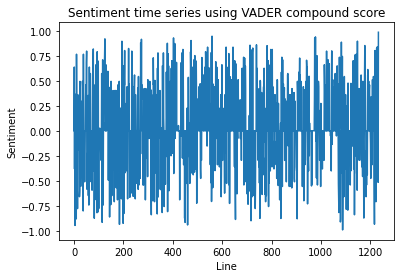

In [18]:
fig, ax = plt.subplots()
ax.plot([line[0] for line in  generate_vader_ts(
    script_splitting(
        random_script(df)))])
ax.set_xlabel('Line')
ax.set_ylabel('Sentiment')
ax.set_title('Sentiment time series using VADER compound score')
plt.show()

### Data preparation for time series

In [19]:
n_lines = [len(script_splitting(script)) for script in df['script']]
mn_lines = np.mean(n_lines)
std_lines = np.std(n_lines)
max_lines = max(n_lines)
min_lines = min(n_lines)

In [20]:
print(f'Average number of lines: {mn_lines}')
print(f'Standard deviation: {std_lines}')
print(f'MAX: {max_lines}')
print(f'MIN: {min_lines}')

Average number of lines: 963.6938596491228
Standard deviation: 378.8496880065324
MAX: 2853
MIN: 1


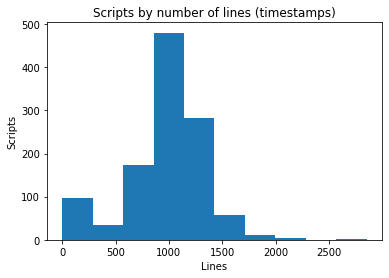

In [21]:
fig, ax = plt.subplots()
ax.hist(n_lines)
ax.set_xlabel('Lines')
ax.set_ylabel('Scripts')
ax.set_title('Scripts by number of lines (timestamps)')
plt.show()